In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
from fractions import Fraction

# ignore warnings
import warnings

warnings.filterwarnings("ignore")

Data source: https://www.kaggle.com/datasets/lantanacamara/hong-kong-horse-racing/data

Feature definition: https://www.kaggle.com/datasets/lantanacamara/hong-kong-horse-racing/discussion/40574

- finishing_position: final position of the race (e.g. 3)
- horse_number: horse number (e.g. 10)
- horse_name: horse name (e.g. GOLDWEAVER)
- horse_id: unique horse id (e.g. P072)
- jockey: jockey name (e.g. Y T Cheng)
- trainer: trainer name (e.g. Y S Tsui)
- actual_weight: The total weight, in pounds, a runner carries during a race including jockey, saddle and extra metal weights. (e.g. 121)
- declared_horse_weight: horse weight in pounds (e.g. 1065)
- draw: The draw refers to a horse’s position in the starting gate. Draw number is randomly assigned by computer a couple of days before the race (e.g. 3)
- length_behind_winner: measurement in horse length between the winner and the running horse. A horse length is approximately 8 feet from nose to tail. (e.g. 2)
- running_position_1: Places during a race where the running positions are indicated in a track chart. (e.g. 2)
- running_position_2: Places during a race where the running positions are indicated in a track chart. (e.g. 1)
- running_position_3: Places during a race where the running positions are indicated in a track chart. (e.g. 1)
- running_position_4: Places during a race where the running positions are indicated in a track chart. (e.g. 3)
- finish_time: race finish time (e.g. 1.22.66)
- win_odds: winning odds and returns. For example win_odds = "3" means "1/3" or "33.3%" chance of winning and return is "3 x initial stake" (e.g. 5.7)
- running_position_5: Places during a race where the running positions are indicated in a track chart. (e.g. NA)
- running_position_6: Places during a race where the running positions are indicated in a track chart. (e.g. NA)
- race_id: race number (e.g. 2014-001)

Symbol Reference: https://racing.hkjc.com/racing/english/racing-info/special_race_index.asp

- DISQ: Disqualified - The horse was disqualified from the race due to a rule violation.
- DNF: Did Not Finish - The horse did not complete the race for some reason.
- FE: Horse fell during the race - Indicates that the horse fell during the race.
- ML: Many Lengths - Often used to describe the winning margin of a horse, indicating that it won by a significant number of lengths.
- PU: Pulled Up - The horse was withdrawn from the race by its jockey or stopped running before completing the race due to an issue.
- TNP: Took No Part - The horse was present at the start of the race but did not participate.
- TO: Tailed Off - The horse lagged far behind the rest of the field during the race.
- UR: Unseated Rider - The jockey fell off the horse during the race.
- VOID: Void Race - The race was declared void, often due to unforeseen circumstances or irregularities.
- WR: Withdrawn-by Starter - The horse was withdrawn from the race by the starter before the race began.
- WV: Withdrawn-on Veterinary Grounds - The horse was withdrawn from the race based on veterinary advice or grounds.
- WV-A: Withdrawn-on Veterinary Grounds after weighing out - The horse was withdrawn from the race based on veterinary advice after the weighing out process.
- WX: Withdrawn-by order of Stewards - The horse was withdrawn from the race by order of the stewards.
- WX-A: Withdrawn-by order of Stewards after weighing out - The horse was withdrawn from the race by order of the stewards after the weighing out process.
- WXNR: Withdrawn-non runner - The horse was withdrawn from the race as a non-runner, often due to injury or other reasons.

Reference for data exploration: https://www.kaggle.com/code/alberthkcheng/hong-kong-horse-racing-explained-with-data/notebook (Note that this reference uses outdated data)


# Data Cleaning and Exploration


In [2]:
# import data
race_result_horse = pd.read_csv("./data/race-result-horse.csv")
race_result_race = pd.read_csv("./data/race-result-race.csv")

In [3]:
race_result_horse.head()

,finishing_position,horse_number,horse_name,horse_id,jockey,trainer,actual_weight,declared_horse_weight,draw,length_behind_winner,running_position_1,running_position_2,running_position_3,running_position_4,finish_time,win_odds,running_position_5,running_position_6,race_id
0,1,1.0,DOUBLE DRAGON,K019,B Prebble,D Cruz,133,1032,1,-,1.0,2.0,2.0,1.0,1.22.33,3.8,NaN,NaN,2014-001
1,2,2.0,PLAIN BLUE BANNER,S070,D Whyte,D E Ferraris,133,1075,13,2,8.0,9.0,9.0,2.0,1.22.65,8,NaN,NaN,2014-001
2,3,10.0,GOLDWEAVER,P072,Y T Cheng,Y S Tsui,121,1065,3,2,2.0,1.0,1.0,3.0,1.22.66,5.7,NaN,NaN,2014-001
3,4,3.0,SUPREME PROFIT,P230,J Moreira,C S Shum,132,1222,2,2,6.0,4.0,5.0,4.0,1.22.66,6.1,NaN,NaN,2014-001
4,5,7.0,THE ONLY KID,H173,Z Purton,K W Lui,125,1136,9,4-1/4,9.0,10.0,10.0,5.0,1.23.02,6.1,NaN,NaN,2014-001


In [4]:
race_result_race.head()

,src,race_date,race_course,race_number,race_id,race_class,race_distance,track_condition,race_name,track,sectional_time,incident_report
0,20140914-1.html,2014-09-14,Sha Tin,1,2014-001,Class 5,1400,GOOD TO FIRM,TIM WA HANDICAP,"TURF - ""A"" COURSE",13.59 22.08 23.11 23.55,\n When about to enter the trac...
1,20140914-10.html,2014-09-14,Sha Tin,10,2014-010,Class 2,1400,GOOD TO FIRM,COTTON TREE HANDICAP,"TURF - ""A"" COURSE",13.55 22.25 22.89 22.85,\n SMART MAN was slow to begin....
2,20140914-2.html,2014-09-14,Sha Tin,2,2014-002,Class 5,1200,GOOD TO FIRM,TIM MEI HANDICAP,"TURF - ""A"" COURSE",24.06 22.25 23.66,\n ALLEY-OOP and FLYING KEEPER ...
3,20140914-3.html,2014-09-14,Sha Tin,3,2014-003,Class 1,1200,GOOD TO FIRM,THE HKSAR CHIEF EXECUTIVE'S CUP (HANDICAP),"TURF - ""A"" COURSE",23.42 22.48 22.47,"\n On arrival at the Start, it ..."
4,20140914-4.html,2014-09-14,Sha Tin,4,2014-004,Class 4,1200,GOOD TO FIRM,LUNG WUI HANDICAP,"TURF - ""A"" COURSE",24.00 22.62 22.64,\n Just prior to the start bein...


## Check for invalid data


In [5]:
race_result_horse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30189 entries, 0 to 30188
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   finishing_position     30187 non-null  object 
 1   horse_number           29851 non-null  float64
 2   horse_name             30189 non-null  object 
 3   horse_id               30189 non-null  object 
 4   jockey                 30189 non-null  object 
 5   trainer                30189 non-null  object 
 6   actual_weight          30189 non-null  object 
 7   declared_horse_weight  30189 non-null  object 
 8   draw                   30189 non-null  object 
 9   length_behind_winner   30189 non-null  object 
 10  running_position_1     29574 non-null  float64
 11  running_position_2     29560 non-null  float64
 12  running_position_3     29542 non-null  float64
 13  running_position_4     16618 non-null  float64
 14  finish_time            30189 non-null  object 
 15  wi

In [6]:
race_result_race.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2367 entries, 0 to 2366
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   src              2367 non-null   object
 1   race_date        2367 non-null   object
 2   race_course      2367 non-null   object
 3   race_number      2367 non-null   int64 
 4   race_id          2367 non-null   object
 5   race_class       2367 non-null   object
 6   race_distance    2367 non-null   int64 
 7   track_condition  2367 non-null   object
 8   race_name        2367 non-null   object
 9   track            2367 non-null   object
 10  sectional_time   2367 non-null   object
 11  incident_report  2367 non-null   object
dtypes: int64(2), object(10)
memory usage: 222.0+ KB


In [7]:
# check for null values
print(race_result_horse.isna().sum())

finishing_position           2
horse_number               338
horse_name                   0
horse_id                     0
jockey                       0
trainer                      0
actual_weight                0
declared_horse_weight        0
draw                         0
length_behind_winner         0
running_position_1         615
running_position_2         629
running_position_3         647
running_position_4       13571
finish_time                  0
win_odds                     0
running_position_5       26425
running_position_6       29640
race_id                      0
dtype: int64


In [8]:
# drop rows where finishing position is null
race_result_horse.dropna(subset=["finishing_position"], inplace=True)

In [9]:
print(race_result_race.isnull().sum())

src                0
race_date          0
race_course        0
race_number        0
race_id            0
race_class         0
race_distance      0
track_condition    0
race_name          0
track              0
sectional_time     0
incident_report    0
dtype: int64


In [10]:
print(race_result_horse.nunique())

finishing_position         36
horse_number               14
horse_name               2162
horse_id                 2162
jockey                    106
trainer                    95
actual_weight              31
declared_horse_weight     399
draw                       16
length_behind_winner      217
running_position_1         14
running_position_2         14
running_position_3         14
running_position_4         14
finish_time              4175
win_odds                  181
running_position_5         14
running_position_6         14
race_id                  2367
dtype: int64


In [11]:
race_result_horse.finishing_position.unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', 'WV-A', '14', 'WV', '9 DH', '2 DH', 'WX', 'PU', '1 DH',
       '8 DH', 'UR', 'FE', '4 DH', '10 DH', 'TNP', '5 DH', 'DISQ',
       '11 DH', '12 DH', '3 DH', '7 DH', 'WX-A', 'DNF', '6 DH'],
      dtype=object)

In [12]:
# extract only the
race_result_horse["finishing_position"] = race_result_horse[
    "finishing_position"
].str.extract("(\d+)")
print(
    race_result_horse["finishing_position"].isna().sum() / len(race_result_horse) * 100,
    "%",
)

# drop rows where finishing position is null
race_result_horse.dropna(subset=["finishing_position"], inplace=True)

race_result_horse["finishing_position"].unique()

2.2128730910656906 %


array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14'], dtype=object)

In [13]:
# convert finishing position to int
race_result_horse["finishing_position"] = race_result_horse[
    "finishing_position"
].astype(int)

# convert horse number to int
race_result_horse["horse_number"] = race_result_horse["horse_number"].astype(int)

# convert actual weight and declared weight to float
race_result_horse["actual_weight"] = race_result_horse["actual_weight"].astype(float)
race_result_horse["declared_horse_weight"] = race_result_horse[
    "declared_horse_weight"
].astype(float)

# convert draw to int
race_result_horse["draw"] = race_result_horse["draw"].astype(int)

In [14]:
race_result_horse.draw.unique()

array([ 1, 13,  3,  2,  9, 11, 12,  8,  6,  7,  4,  5, 14, 10, 15])

In [15]:
# drop row where draw exceeds 14
race_result_horse = race_result_horse[race_result_horse["draw"] <= 14]

In [16]:
# check if all the finish time are in the format of 'x.xx.xx'
race_result_horse["finish_time"].str.contains(
    "\d+.\d+.\d+", na=False, regex=True
).value_counts()

True    29518
Name: finish_time, dtype: int64

In [17]:
# parse the finish time to milliseconds
def convert_to_milliseconds(time_str):
    parts = time_str.split(".")
    minutes = int(parts[0]) * 60 * 1000
    seconds = int(parts[1]) * 1000
    hundredths = int(parts[2]) * 10
    return minutes + seconds + hundredths


race_result_horse["finish_time_ms"] = (
    race_result_horse["finish_time"].apply(convert_to_milliseconds).astype(float)
)

In [18]:
# check if all win_odds are in the format of 'x.x' or 'x'
race_result_horse["win_odds"].str.contains(
    "\d+(\.\d+)?", na=False, regex=True
).value_counts()

True    29518
Name: win_odds, dtype: int64

In [19]:
race_result_horse["win_odds"] = race_result_horse["win_odds"].astype(float)

In [20]:
race_result_horse.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29518 entries, 0 to 30186
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   finishing_position     29518 non-null  int64  
 1   horse_number           29518 non-null  int64  
 2   horse_name             29518 non-null  object 
 3   horse_id               29518 non-null  object 
 4   jockey                 29518 non-null  object 
 5   trainer                29518 non-null  object 
 6   actual_weight          29518 non-null  float64
 7   declared_horse_weight  29518 non-null  float64
 8   draw                   29518 non-null  int64  
 9   length_behind_winner   29518 non-null  object 
 10  running_position_1     29518 non-null  float64
 11  running_position_2     29518 non-null  float64
 12  running_position_3     29518 non-null  float64
 13  running_position_4     16612 non-null  float64
 14  finish_time            29518 non-null  object 
 15  wi

In [21]:
print(race_result_race.nunique())

src                2367
race_date           254
race_course           2
race_number          11
race_id            2367
race_class           16
race_distance         9
track_condition       9
race_name          1084
track                 7
sectional_time     2367
incident_report    2367
dtype: int64


In [22]:
# convert race_date to date 
race_result_race["race_date"] = pd.to_datetime(race_result_race["race_date"])

In [23]:
race_result_race.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2367 entries, 0 to 2366
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   src              2367 non-null   object        
 1   race_date        2367 non-null   datetime64[ns]
 2   race_course      2367 non-null   object        
 3   race_number      2367 non-null   int64         
 4   race_id          2367 non-null   object        
 5   race_class       2367 non-null   object        
 6   race_distance    2367 non-null   int64         
 7   track_condition  2367 non-null   object        
 8   race_name        2367 non-null   object        
 9   track            2367 non-null   object        
 10  sectional_time   2367 non-null   object        
 11  incident_report  2367 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 222.0+ KB


In [24]:
# check if all the race_id exist in src
horse_race_ids = set(race_result_horse.race_id.unique())
race_ids = set(race_result_race.race_id.unique())

# if the intersection is the same length as the horse_race_ids, then all ids in horse data set exist in race data set
print(len(horse_race_ids & race_ids) == len(horse_race_ids))

True


In [25]:
race_result_horse[race_result_horse.draw == 15]

,finishing_position,horse_number,horse_name,horse_id,jockey,trainer,actual_weight,declared_horse_weight,draw,length_behind_winner,running_position_1,running_position_2,running_position_3,running_position_4,finish_time,win_odds,running_position_5,running_position_6,race_id,finish_time_ms


## Number of horse in a race

- There are at most 14 horses in a race, with a minimum of 5.
- Majority being 12 or 14.
- Median is 12.


Median 12.0


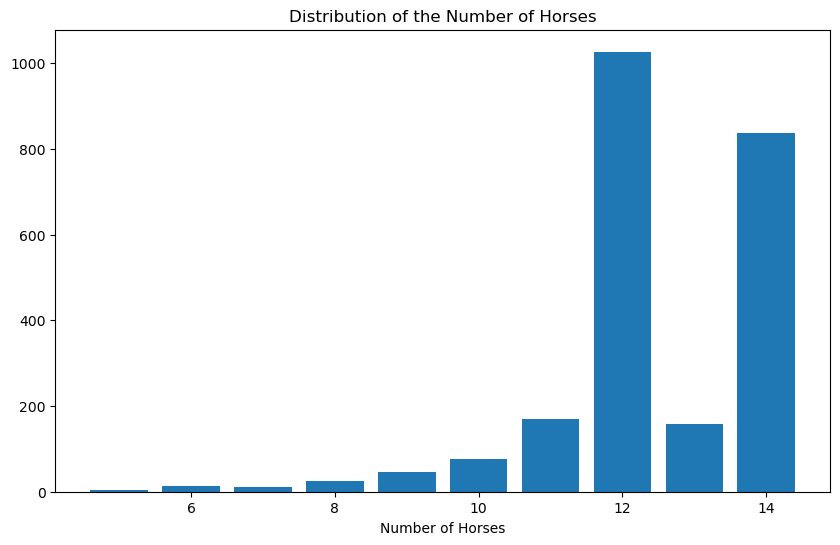

In [26]:
# group by race_id and count the number of horses
count_horse_per_race = race_result_horse.groupby("race_id", as_index=True).count()[
    "horse_id"
]

print("Median", count_horse_per_race.median())

# plot the distribution of the number of horses
plt.figure(figsize=(10, 6))
plt.bar(
    count_horse_per_race.value_counts().index,
    count_horse_per_race.value_counts().values,
)
plt.xlabel("Number of Horses")
plt.ylabel
plt.title("Distribution of the Number of Horses")
plt.show()

# Data Analysis


## Handicap System¶

Hong Kong horse racing use handicap system: horse no.1 has the highest rating and carry the heaviest weight (from reference).


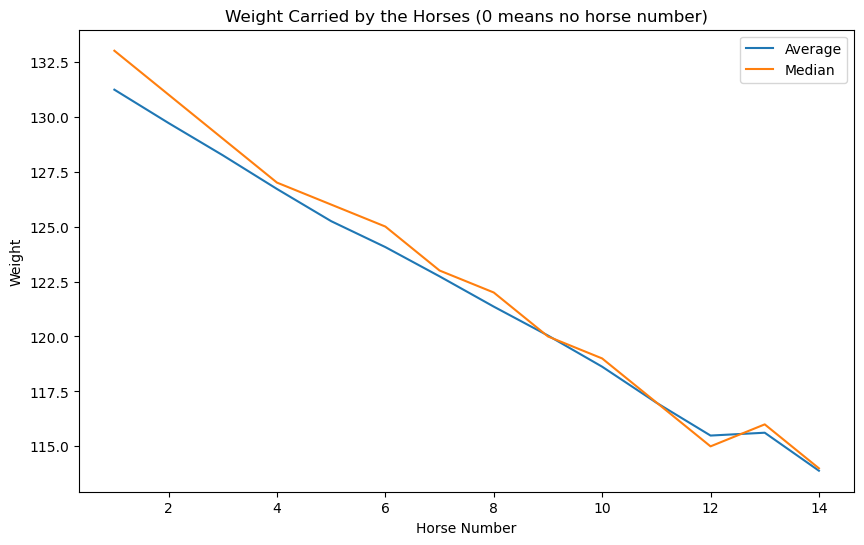

In [27]:
# get the average weight carried by the horses group by horse number
horse_number_and_weight = race_result_horse[["actual_weight", "horse_number"]]

# remove the rows with "-" in the actual_weight column
# horse_number_and_weight = horse_number_and_weight[horse_number_and_weight["actual_weight"] != "-"]

# # convert the weight to numeric
# horse_number_and_weight["actual_weight"] = pd.to_numeric(horse_number_and_weight["actual_weight"], errors='coerce')

# set the null values in horse_number to 0
# horse_number_and_weight["horse_number"] = horse_number_and_weight["horse_number"].fillna(0)

# group by horse number and get the average weight
average_horse_number_and_weight = horse_number_and_weight.groupby("horse_number").mean()
median_horse_number_and_weight = horse_number_and_weight.groupby(
    "horse_number"
).median()

# plot the average weight carried by the horses
plt.figure(figsize=(10, 6))
plt.plot(
    average_horse_number_and_weight.index,
    average_horse_number_and_weight["actual_weight"],
    label="Average",
)
plt.plot(
    median_horse_number_and_weight.index,
    median_horse_number_and_weight["actual_weight"],
    label="Median",
)
plt.xlabel("Horse Number")
plt.ylabel("Weight")
plt.title("Weight Carried by the Horses (0 means no horse number)")
plt.legend()
plt.show()

## Draw

Draw number is randomly assigned by computer a couple of days before. It refers to the lane number of the horse in the starting gate.\
The innermost lane is 1, and the outermost lane is 14. Thus, the lower the draw number, the better the position as the horse will have a shorter distance to run.


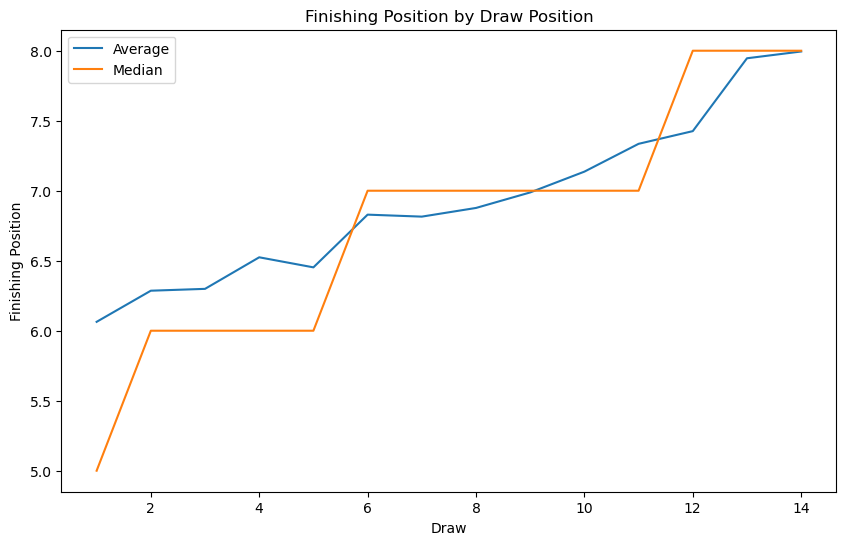

In [28]:
# get the average time taken to finish and the draw position
horse_number_and_finishing_position = race_result_horse[["finishing_position", "draw"]]


# group by draw and get the average time taken to finish
average_horse_number_and_finishing_position = (
    horse_number_and_finishing_position.groupby("draw").mean()
)
median_horse_number_and_finishing_position = (
    horse_number_and_finishing_position.groupby("draw").median()
)


# plot the average weight carried by the horses
plt.figure(figsize=(10, 6))
plt.plot(
    average_horse_number_and_finishing_position.index,
    average_horse_number_and_finishing_position["finishing_position"],
    label="Average",
)
plt.plot(
    median_horse_number_and_finishing_position.index,
    median_horse_number_and_finishing_position["finishing_position"],
    label="Median",
)
plt.xlabel("Draw")
plt.ylabel("Finishing Position")
plt.title("Finishing Position by Draw Position")
plt.legend()

# Track Condition

Depending on the track condition, the horse may perform differently.


In [29]:
race_result_race["track_condition"].unique()

array(['GOOD TO FIRM', 'WET FAST', 'GOOD', 'GOOD TO YIELDING', 'WET SLOW',
       'FAST', 'YIELDING', 'YIELDING TO SOFT', 'SOFT'], dtype=object)

In [30]:
# merge the two data sets
race_result = race_result_race.merge(race_result_horse, how="inner", on="race_id")
race_result.head()

,src,race_date,race_course,race_number,race_id,race_class,race_distance,track_condition,race_name,track,...,length_behind_winner,running_position_1,running_position_2,running_position_3,running_position_4,finish_time,win_odds,running_position_5,running_position_6,finish_time_ms
0,20140914-1.html,2014-09-14,Sha Tin,1,2014-001,Class 5,1400,GOOD TO FIRM,TIM WA HANDICAP,"TURF - ""A"" COURSE",...,-,1.0,2.0,2.0,1.0,1.22.33,3.8,NaN,NaN,82330.0
1,20140914-1.html,2014-09-14,Sha Tin,1,2014-001,Class 5,1400,GOOD TO FIRM,TIM WA HANDICAP,"TURF - ""A"" COURSE",...,2,8.0,9.0,9.0,2.0,1.22.65,8.0,NaN,NaN,82650.0
2,20140914-1.html,2014-09-14,Sha Tin,1,2014-001,Class 5,1400,GOOD TO FIRM,TIM WA HANDICAP,"TURF - ""A"" COURSE",...,2,2.0,1.0,1.0,3.0,1.22.66,5.7,NaN,NaN,82660.0
3,20140914-1.html,2014-09-14,Sha Tin,1,2014-001,Class 5,1400,GOOD TO FIRM,TIM WA HANDICAP,"TURF - ""A"" COURSE",...,2,6.0,4.0,5.0,4.0,1.22.66,6.1,NaN,NaN,82660.0
4,20140914-1.html,2014-09-14,Sha Tin,1,2014-001,Class 5,1400,GOOD TO FIRM,TIM WA HANDICAP,"TURF - ""A"" COURSE",...,4-1/4,9.0,10.0,10.0,5.0,1.23.02,6.1,NaN,NaN,83020.0


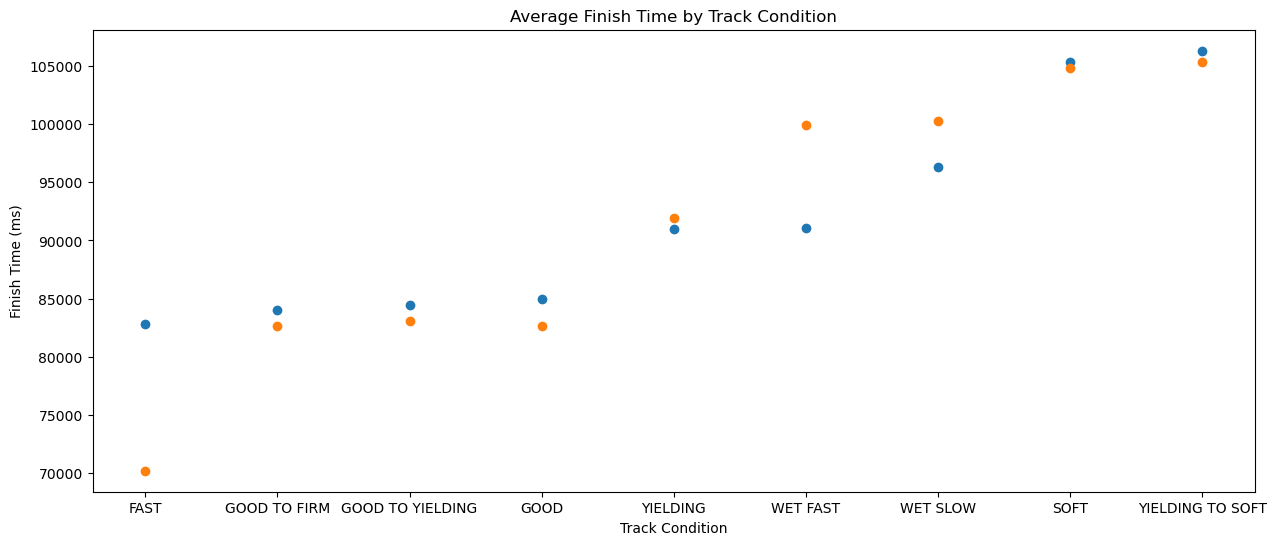

In [31]:
# group the race result by race id and get the average finish time
average_finish_by_track_condition = race_result.groupby(
    "track_condition", as_index=True
).mean()["finish_time_ms"]
median_finish_by_track_condition = race_result.groupby(
    "track_condition", as_index=True
).median()["finish_time_ms"]

# sort the average finish time
average_finish_by_track_condition = average_finish_by_track_condition.sort_values()


# plot the average finish time against the track condition
plt.figure(figsize=(15, 6))
plt.scatter(
    average_finish_by_track_condition.index, average_finish_by_track_condition.values
)
plt.scatter(
    median_finish_by_track_condition.index, median_finish_by_track_condition.values
)
plt.xlabel("Track Condition")
plt.ylabel("Finish Time (ms)")
plt.title("Average Finish Time by Track Condition")
plt.show()

In [32]:
# calculate the speed of the horses in m/s
race_result["speed"] = (
    race_result["race_distance"] / race_result["finish_time_ms"] * 1000
)
# convert finish time to seconds
race_result["finish_time"] = race_result["finish_time_ms"] / 1000
# group by horse_id and get the average finish time and the average distance run
grouped_race_by_horse_id = race_result.groupby("horse_id", as_index=True)


horse_stats = pd.DataFrame()
horse_stats["avg_finish_time"] = grouped_race_by_horse_id.mean()["finish_time"]
horse_stats["std_finish_time"] = grouped_race_by_horse_id.std()["finish_time"]
horse_stats["avg_race_distance"] = grouped_race_by_horse_id.mean()["race_distance"]
horse_stats["std_race_distance"] = grouped_race_by_horse_id.std()["race_distance"]
horse_stats["avg_speed"] = grouped_race_by_horse_id.mean()["speed"]
horse_stats["std_speed"] = grouped_race_by_horse_id.std()["speed"]
horse_stats.head()

,avg_finish_time,std_finish_time,avg_race_distance,std_race_distance,avg_speed,std_speed
horse_id,,,,,,
A001,70.716667,0.995707,1200.000000,0.000000,16.971352,0.237131
A002,116.136667,17.454524,1916.666667,262.274434,16.536088,0.302170
A003,92.130000,10.591308,1537.500000,157.548179,16.711866,0.336438
A004,80.852222,13.205040,1361.111111,202.758751,16.872089,0.276217
A005,89.147500,12.924722,1481.250000,188.864086,16.650030,0.301686


In [33]:
# perform monte carlo simulation for each race

# create a dataframe to store the simulated race result with columns race_id, horse_id, number_of_win, number_of_simulation
simulated_race_result = pd.DataFrame(
    columns=["race_id", "horse_id", "number_of_win", "number_of_simulation", "win_odds", "race_date"]
)
simulated_race_result[["race_id", "horse_id", "win_odds","race_date"]] = race_result[
    ["race_id", "horse_id", "win_odds","race_date"]
]
simulated_race_result["win"] = race_result["finishing_position"] == 1

# index on teh race_id and horse_id
simulated_race_result = simulated_race_result.set_index(["race_id", "horse_id"])

In [34]:
NUM_SIMULATION = 10
simulated_race_result["number_of_win"] = 0
simulated_race_result["number_of_simulation"] = NUM_SIMULATION
for race_id in simulated_race_result.index.get_level_values(0).unique():
    horse_ids = simulated_race_result.loc[race_id].index
    # perform monte carlo simulation for each horse
    # retrieve mean and variance of time for each horse
    for run in range(NUM_SIMULATION):
        winner_horse = (0, float("inf"))
        for horse_id in horse_ids:
            time = (
                horse_id,
                np.random.normal(
                    horse_stats.loc[horse_id, "avg_finish_time"],
                    horse_stats.loc[horse_id, "std_finish_time"],
                ),
            )
            if time[1] < winner_horse[1]:
                winner_horse = (horse_id, time[1])
        # update the number of wins for the winning horse

        simulated_race_result["number_of_win"][race_id, winner_horse[0]] += 1

In [35]:
# save the simulated_race_result as a pickle file
import pickle

# with open("pickle_file/simulated_race_result_by_avg_time.pkl", "wb") as f:
#     pickle.dump(simulated_race_result, f)

# load the simulated_race_result from the pickle file
with open("pickle_file/simulated_race_result_by_avg_time.pkl", "rb") as f:
    simulated_race_result = pickle.load(f)

# Flat 1 unit of bet on positive expected value

In [36]:

simulated_race_result["implied_win_probability"] = 1 / simulated_race_result["win_odds"]
simulated_race_result["empirical_win_probability"] = simulated_race_result["implied_win_probability"]
simulated_race_result["to_bet"] = True
simulated_race_result["cost"] = 1
simulated_race_result["expected_payoff"] = (
    simulated_race_result["win_odds"]
    * simulated_race_result["cost"]
    * simulated_race_result["empirical_win_probability"]
)
simulated_race_result["expected_profit"] = (
    simulated_race_result["expected_payoff"] - simulated_race_result["cost"]
)

In [37]:
simulated_race_result["actual_profit"] = simulated_race_result["to_bet"] * (
    simulated_race_result["win"] * simulated_race_result["win_odds"]*simulated_race_result["cost"]
    - simulated_race_result["cost"]
)

In [38]:
# calculate the total profit for each race
pnl = simulated_race_result.groupby("race_id").sum()["actual_profit"]
cumulative_pnl = pnl.cumsum()

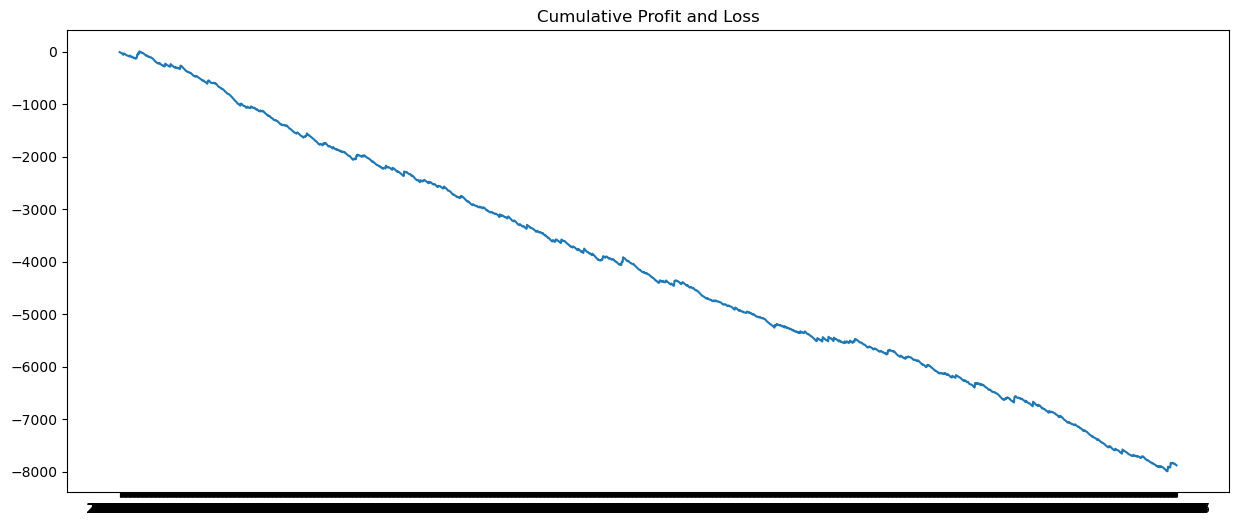

In [39]:
# plot the cumulative profit and loss
plt.figure(figsize=(15, 6))
plt.plot(cumulative_pnl.index, cumulative_pnl.values)
plt.xlabel
plt.ylabel
plt.title("Cumulative Profit and Loss")
plt.show()

# Optimal Betting using Kelly Criterion

The Kelly Criterion is a mathematical formula that helps investors and gamblers calculate what percentage of their investment they should risk in order to maximize their returns. The formula is: \
f* = (bp - q) / b \
where: \
f* = the fraction of the current bankroll to wager \
b = the odds received on the bet \
p = the probability of winning \
q = the probability of losing, which is 1 - p

Proportional betting based on fraction of current assets provides poor results. \
On the other hand, using Kelly Criterion to provide the optimal fraction of a constant value bet provides better results. 

Note: we filter out bets with horse data points less than 10 to avoid overfitting.


In [40]:
# reset the results
with open("pickle_file/simulated_race_result_by_avg_time.pkl", "rb") as f:
    simulated_race_result = pickle.load(f)

In [41]:

simulated_race_result["implied_win_probability"] = 1 / simulated_race_result["win_odds"]
simulated_race_result["empirical_win_probability"] = simulated_race_result["implied_win_probability"]
simulated_race_result["to_bet"] = (
    simulated_race_result["empirical_win_probability"]
    > simulated_race_result["implied_win_probability"]
)

In [42]:
# set cost using kelley criterion
b = simulated_race_result["win_odds"] - 1
p = simulated_race_result["empirical_win_probability"]
q = 1 - p
simulated_race_result["cost"] = (b * p - q) / b 

# do not bet if the data points are not enough
horse_counts = simulated_race_result.value_counts("horse_id")

# filter out bets with negative cost and horses with less than 10 data points
simulated_race_result["to_bet"] = True
# set cost to 0 if the cost is negative
simulated_race_result["cost"] = np.where(
    simulated_race_result["cost"] < 0, 0, simulated_race_result["cost"]
)

simulated_race_result["expected_payoff"] = (
    simulated_race_result["win_odds"]
    * simulated_race_result["cost"]
    * simulated_race_result["empirical_win_probability"]
)
simulated_race_result["expected_profit"] = (
    simulated_race_result["expected_payoff"] - simulated_race_result["cost"]
)

In [43]:
simulated_race_result["actual_profit"] = simulated_race_result["to_bet"] * (
    simulated_race_result["win"] * simulated_race_result["win_odds"] *simulated_race_result["cost"]
    - simulated_race_result["cost"]
)

In [44]:
simulated_race_result.cost.describe()

count    2.951700e+04
mean     2.740396e-18
std      1.149317e-17
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      4.163336e-16
Name: cost, dtype: float64

In [45]:
simulated_race_result.loc["2016-039"]

,number_of_win,number_of_simulation,win_odds,race_date,win,implied_win_probability,empirical_win_probability,to_bet,cost,expected_payoff,expected_profit,actual_profit
horse_id,,,,,,,,,,,,
S378,316,1000,77.0,2016-09-21,True,0.012987,0.012987,True,1.460820e-18,1.460820e-18,0.0,1.110223e-16
T064,236,1000,53.0,2016-09-21,False,0.018868,0.018868,True,0.000000e+00,0.000000e+00,0.0,0.000000e+00
P268,8,1000,7.1,2016-09-21,False,0.140845,0.140845,True,0.000000e+00,0.000000e+00,0.0,0.000000e+00
T108,117,1000,8.2,2016-09-21,False,0.121951,0.121951,True,0.000000e+00,0.000000e+00,0.0,0.000000e+00
P044,14,1000,8.4,2016-09-21,False,0.119048,0.119048,True,0.000000e+00,0.000000e+00,0.0,0.000000e+00
T336,78,1000,3.0,2016-09-21,False,0.333333,0.333333,True,0.000000e+00,0.000000e+00,0.0,0.000000e+00
S388,19,1000,4.8,2016-09-21,False,0.208333,0.208333,True,0.000000e+00,0.000000e+00,0.0,0.000000e+00
S339,128,1000,7.8,2016-09-21,False,0.128205,0.128205,True,1.632681e-17,1.632681e-17,0.0,-1.632681e-17
P324,27,1000,13.0,2016-09-21,False,0.076923,0.076923,True,0.000000e+00,0.000000e+00,0.0,0.000000e+00


In [46]:
# sort the simulated_race_result by race_id
simulated_race_result.sort_index(inplace=True)

In [47]:
# calculate the total profit for each race
pnl_by_race = simulated_race_result.groupby("race_id").sum()["actual_profit"]

# only do bets where pnl is

In [48]:
pnl_by_race.sort_values()

race_id
2016-571   -1.906376e-16
2016-501   -1.498801e-16
2014-087   -1.390937e-16
2014-485   -1.387779e-16
2016-311   -1.352195e-16
                ...     
2015-257    1.110223e-16
2014-388    1.110223e-16
2014-381    1.110223e-16
2015-141    1.110223e-16
2015-695    1.110223e-16
Name: actual_profit, Length: 2367, dtype: float64

In [49]:
# win money
cumsum_pnl_by_race = pnl_by_race.cumsum()

#lose money
cumprod_pnl_by_race = (pnl_by_race + 1).cumprod() - 1

In [50]:
pnl_by_date = simulated_race_result.groupby("race_date").sum()["actual_profit"]
cumsum_pnl_by_date = pnl_by_date.cumsum()

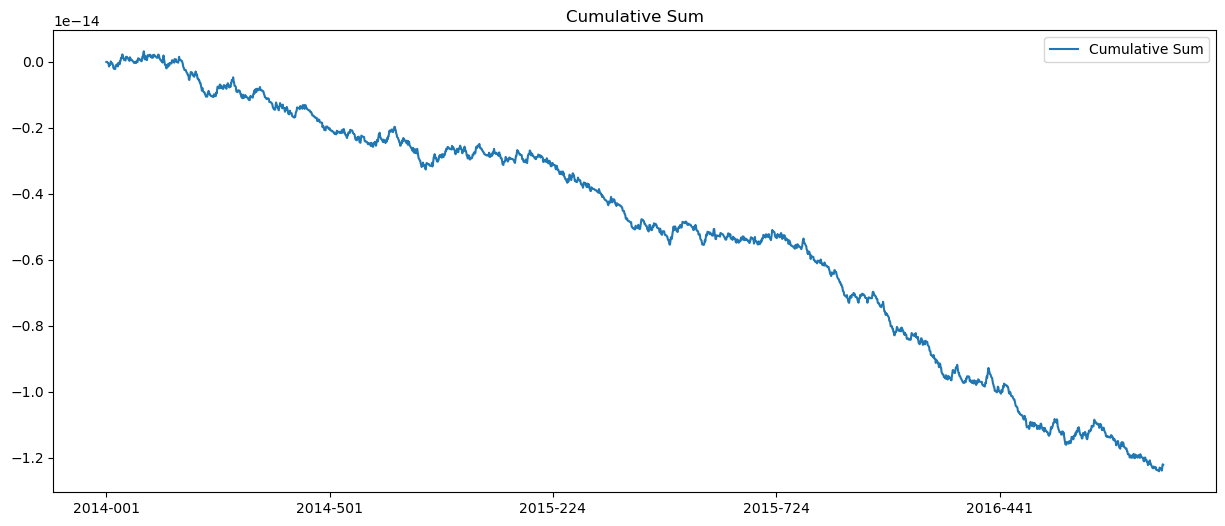

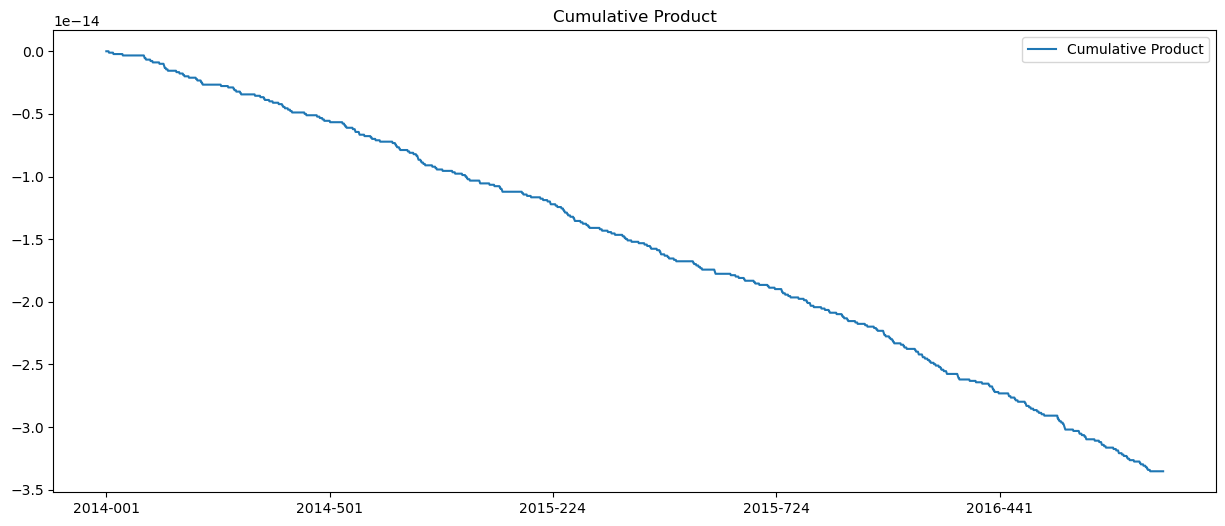

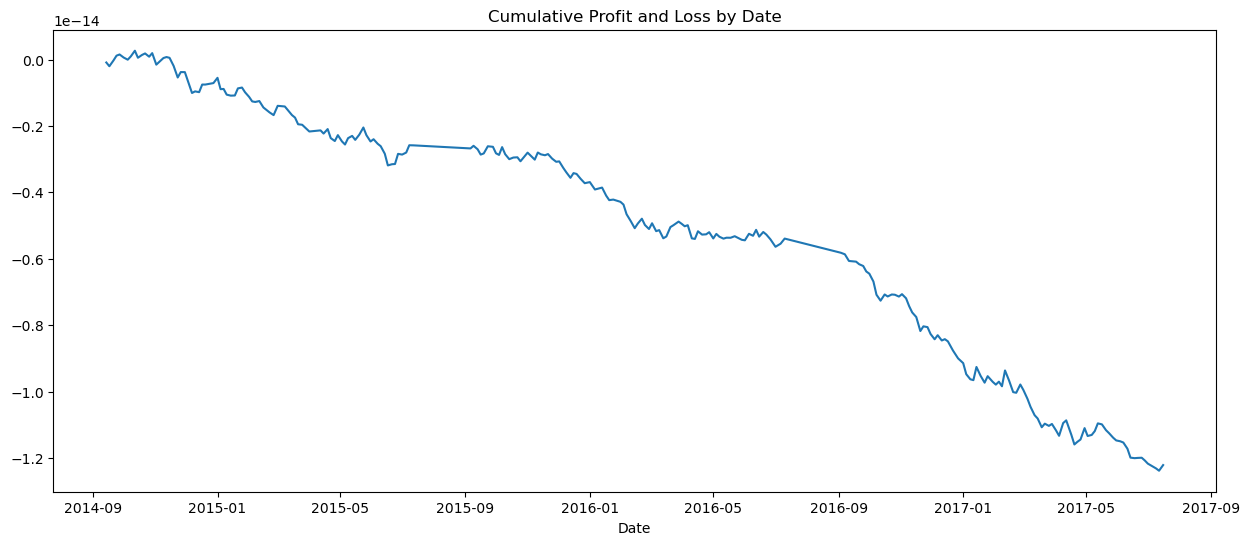

In [51]:
# plot the cum_sum and cum_prod
plt.figure(figsize=(15, 6))
plt.plot(cumsum_pnl_by_race.index, cumsum_pnl_by_race.values, label="Cumulative Sum")
# set the xticks to be after every 500 ticks
plt.xticks(np.arange(0, len(cumsum_pnl_by_race), 500))
plt.title("Cumulative Sum")
plt.legend()
plt.show()

plt.figure(figsize=(15, 6))
plt.plot(cumprod_pnl_by_race.index, cumprod_pnl_by_race.values, label="Cumulative Product")
plt.xticks(np.arange(0, len(cumprod_pnl_by_race), 500))
plt.title("Cumulative Product")
plt.legend()
plt.show()

# plot the cumulative profit and loss by date
plt.figure(figsize=(15, 6))
plt.plot(cumsum_pnl_by_date.index, cumsum_pnl_by_date.values)
plt.xlabel("Date")
plt.title("Cumulative Profit and Loss by Date")
plt.show()

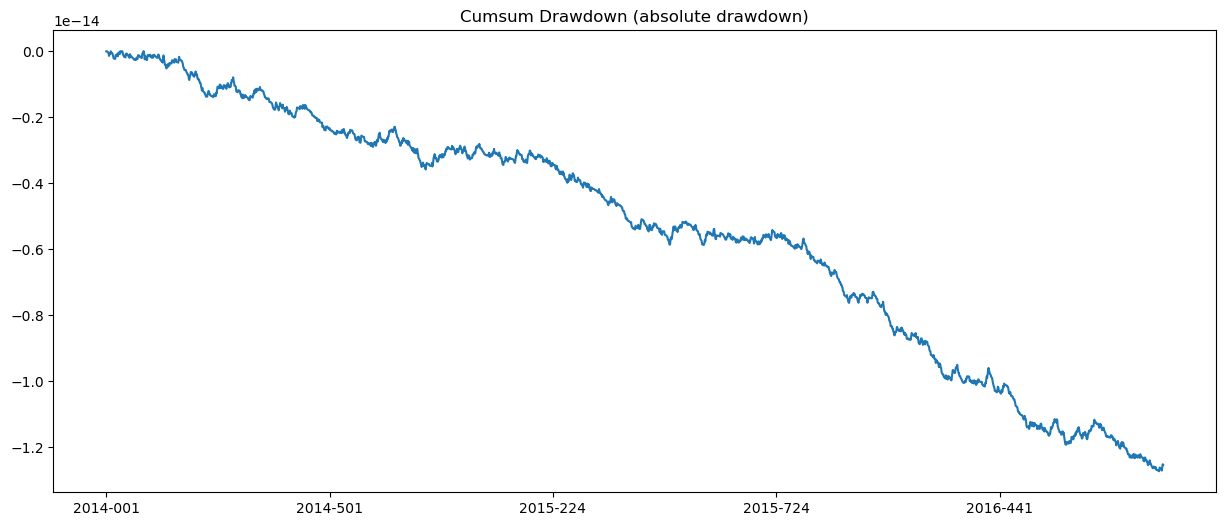

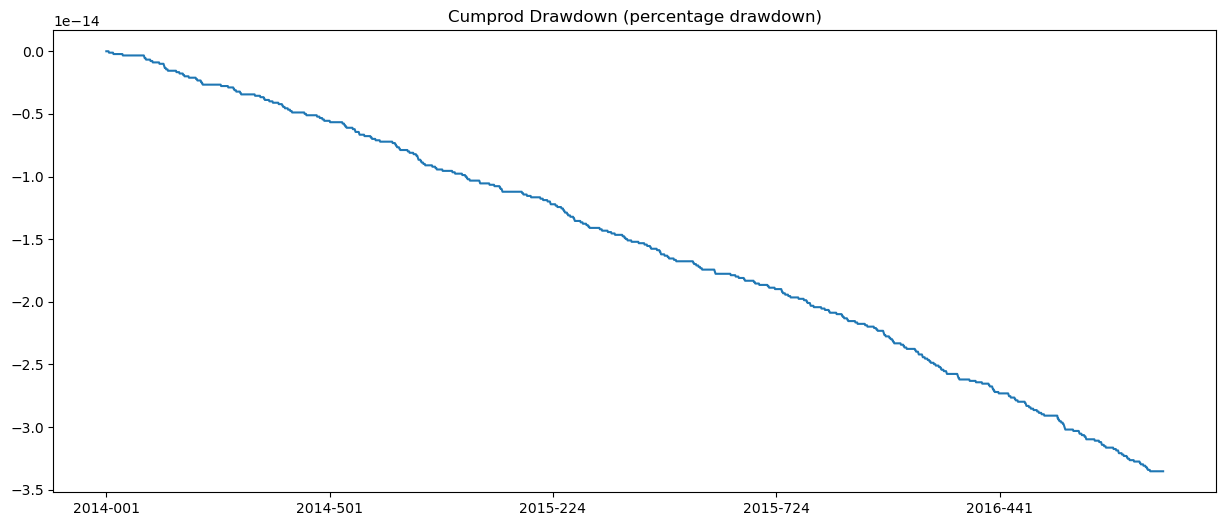

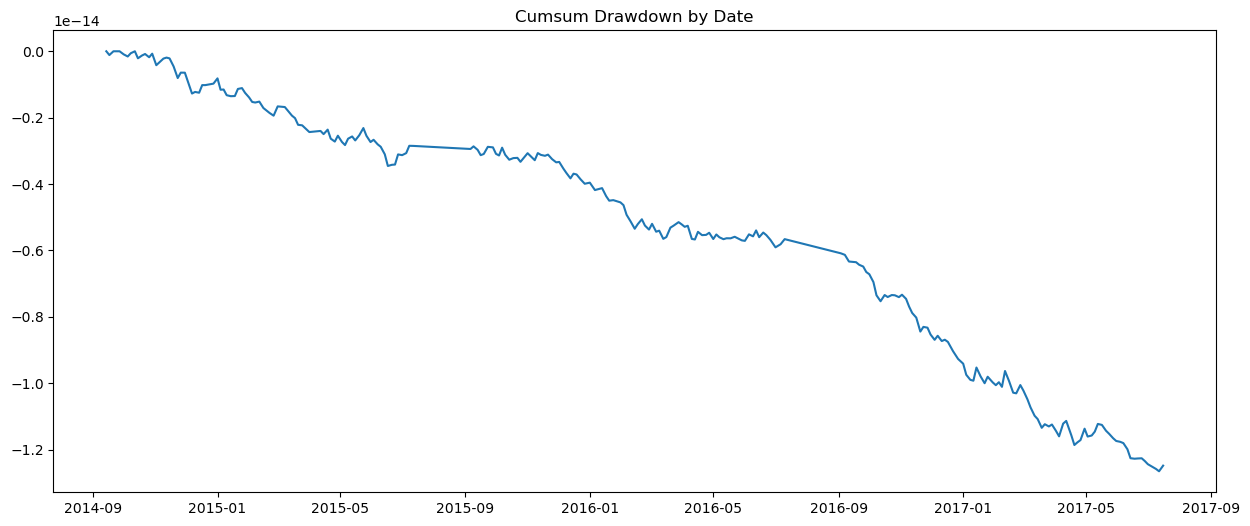

In [52]:
# plot drawdown
cumsum_drawdown_by_race = cumsum_pnl_by_race - cumsum_pnl_by_race.expanding().max()
plt.figure(figsize=(15, 6))
plt.plot(cumsum_drawdown_by_race.index, cumsum_drawdown_by_race.values)
plt.xticks(np.arange(0, len(cumsum_drawdown_by_race), 500))
plt.title("Cumsum Drawdown (absolute drawdown)")
plt.show()

cumprod_drawdown_by_race = (cumprod_pnl_by_race+1) / (cumprod_pnl_by_race+1).expanding().max()  -1
plt.figure(figsize=(15, 6))
plt.plot(cumprod_drawdown_by_race.index, cumprod_drawdown_by_race.values)
plt.xticks(np.arange(0, len(cumprod_drawdown_by_race), 500))
plt.title("Cumprod Drawdown (percentage drawdown)")
plt.show()

cumsum_drawdown_by_date = cumsum_pnl_by_date - cumsum_pnl_by_date.expanding().max()
plt.figure(figsize=(15, 6))
plt.plot(cumsum_drawdown_by_date.index, cumsum_drawdown_by_date.values)
plt.title("Cumsum Drawdown by Date")
plt.show()

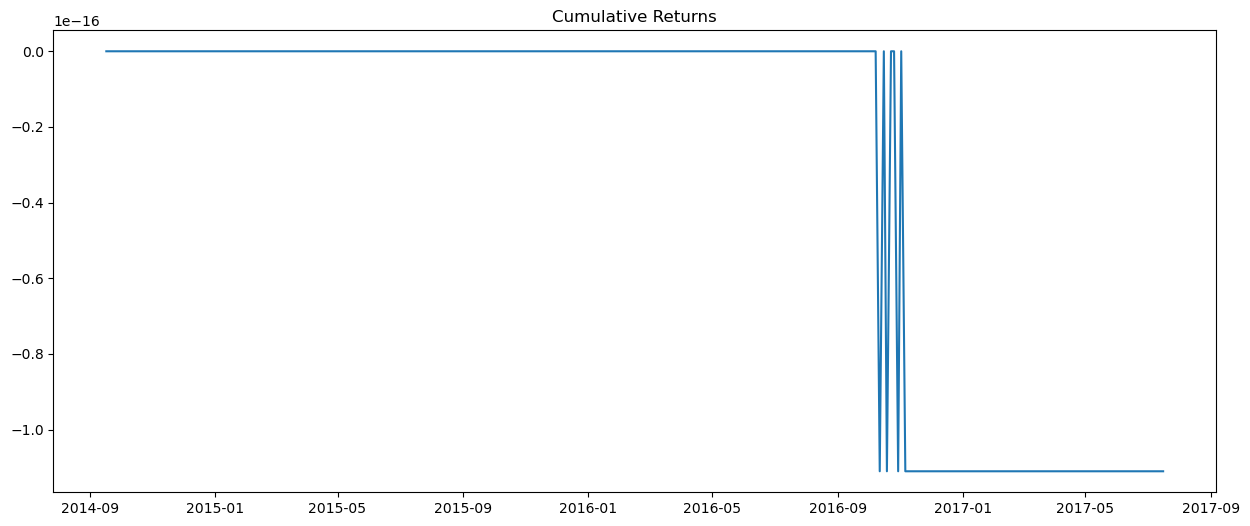

In [53]:
# assume you start with 100 dollars
INITIAL_CAPITAL = 100
daily_capital = INITIAL_CAPITAL + cumsum_pnl_by_date
daily_returns = daily_capital.pct_change()
cumulative_returns = (1 + daily_returns).cumprod() - 1

# plot the cumulative returns
plt.figure(figsize=(15, 6))
plt.plot(cumulative_returns.index, cumulative_returns.values)
plt.title("Cumulative Returns")
plt.show()


In [54]:
# calculate the sharpe ratio
sharpe_ratio = daily_returns.mean() / daily_returns.std() * np.sqrt(252)
print("Sharpe Ratio", sharpe_ratio)

Sharpe Ratio 0.4982699570693318
